In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anz=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
anz.shape

(12043, 23)

There are 12043 rows and 23 columns in the dataset.








In [5]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
anz.account.nunique()#there are 100 unique customers.

100

In [7]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [8]:
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


the average transaction amount is 187.97 dollars and the average balance is 14704 dollars.

anz.describe(include=object)

In [9]:
anz.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
anz.isnull().sum().sum()

43948

there are 43948 missing values in the dataset

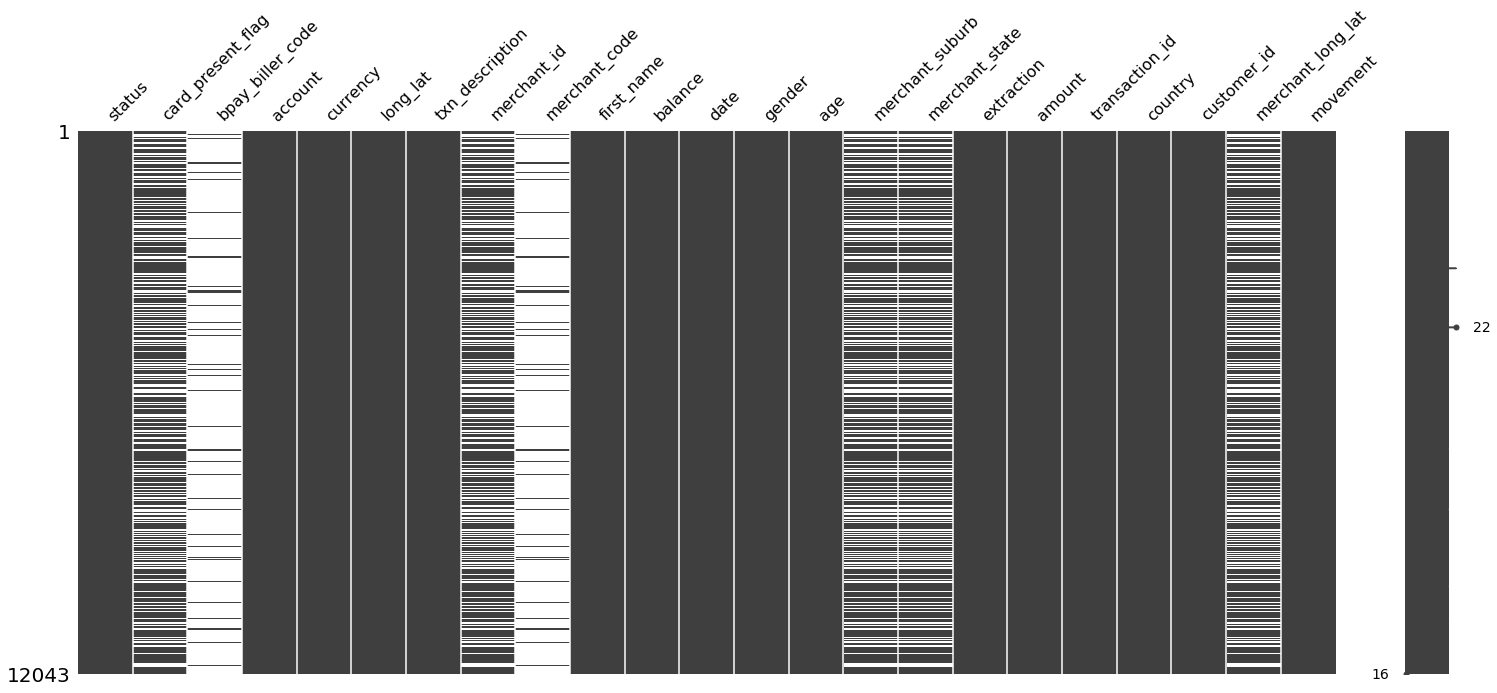

In [11]:
import missingno as msn
msn.matrix(anz)

In [12]:
#The number of missing values are highest in bpay_biller_code and merchant_code. There is a pattern among the missing values in them as well. Also there is a pattern among card_present_flag and merchant_id,merchant_suburb,merchant_state and merchant_log_lat columns.

In [13]:
anz.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

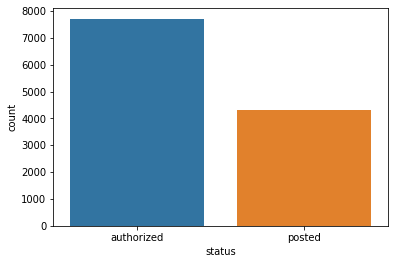

In [14]:
sns.countplot(anz.status)

Authorise transactions are higher compared to posted transactions

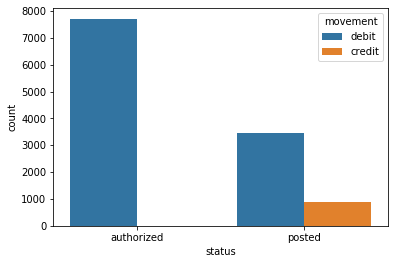

In [15]:
sns.countplot(x='status',hue='movement',data=anz)

credited transactions are all of posted category

In [16]:
anz.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

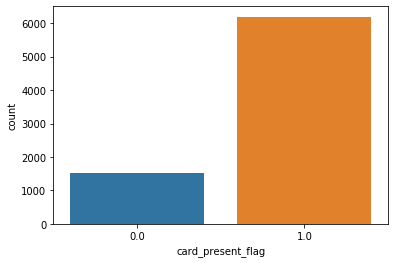

In [17]:
sns.countplot(anz.card_present_flag)

In [18]:
anz.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

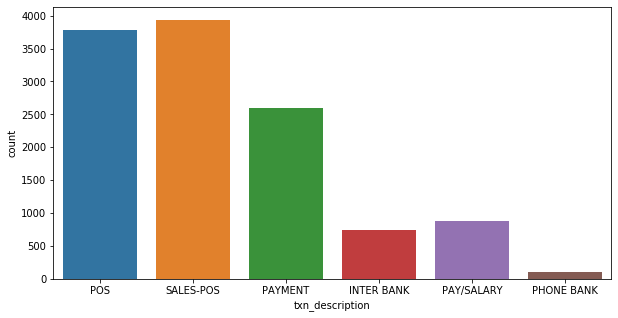

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(anz.txn_description)

he sales pos and pos transactions are the highest while phone banking and internet banking transactions are the lowest transactions.

In [20]:
anz.bpay_biller_code.value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

In [21]:
anz.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

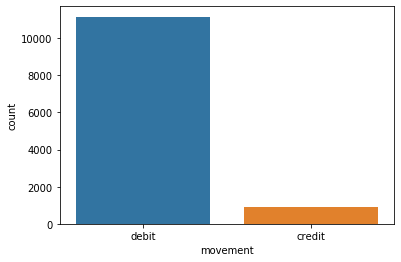

In [22]:
sns.countplot(anz.movement)

the number of debit transactions are higher than the number of credicted transactions.

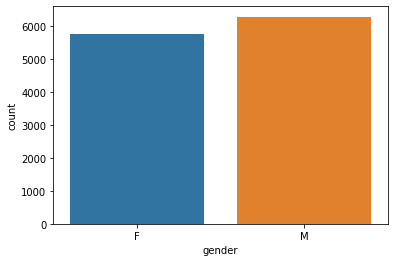

In [23]:
sns.countplot(anz.gender)

transaction done by males are higher than the transactions done by females.

In [24]:
anz.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

In [25]:
anz.country.value_counts()

Australia    12043
Name: country, dtype: int64

The country and currency are redundant columns so we need to remove them.

we need to remove bpay_biller_code,merchant_code as the no of missing values are high and we need to remove country and currency as those are redundant features.

In [26]:
df=anz.drop(['country','currency','bpay_biller_code','merchant_code'],axis=1)

In [27]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit


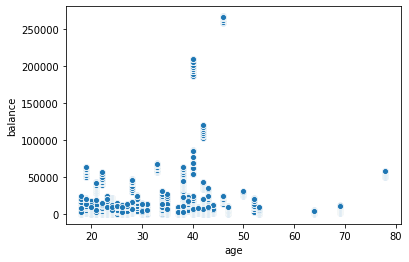

In [28]:
sns.scatterplot(x='age',y='balance',data=df)

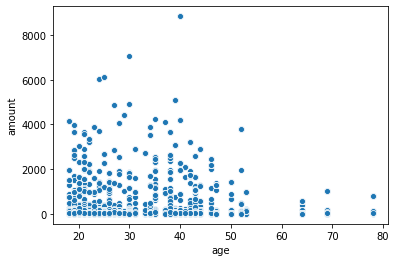

In [29]:
sns.scatterplot(x='age',y='amount',data=df)

In [30]:
df.corr()

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


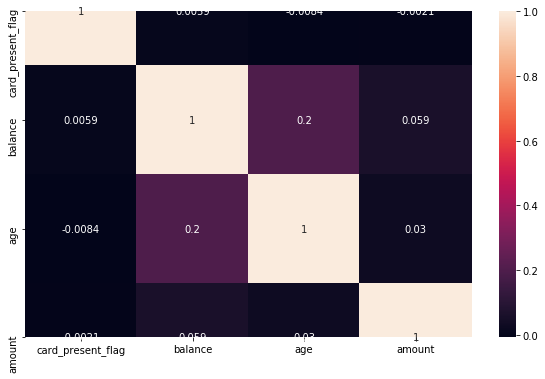

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

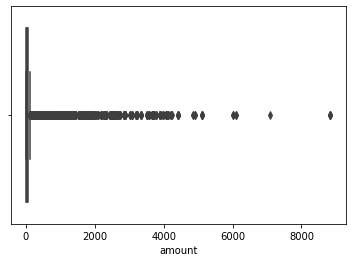

In [32]:
sns.boxplot(df.amount)

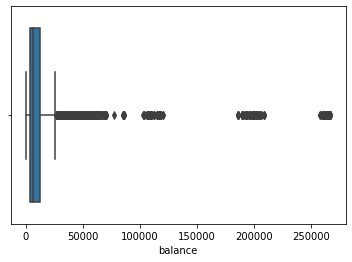

In [33]:
sns.boxplot(df.balance)

There are outliers in the amount and balance features,but these are extreme values so we cant remove them.

In [34]:
df['month'] = pd.DatetimeIndex(df['date']).month

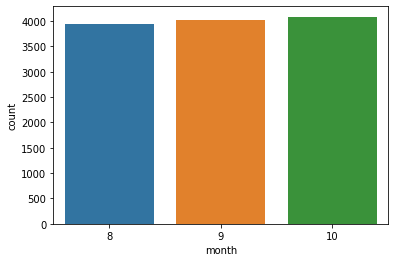

In [35]:
sns.countplot(df.month)

there is a slight increase in the number of transactions from august to october.

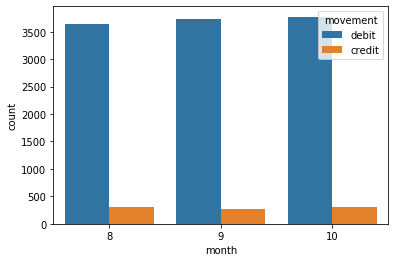

In [36]:
sns.countplot(x=df.month,hue='movement',data=df)

In [37]:
customers=df.groupby(['account']).agg({'amount':'sum'})
highest_spending_customers=customers.sort_values(by='amount',ascending=False)
highest_spending_customers.head(10)

,amount
account,
ACC-3317636250,45409.16
ACC-1496451953,42688.30
ACC-1523339231,40215.54
ACC-2231965366,37943.79
ACC-240804743,36786.13
ACC-1710017148,36639.41
ACC-958000567,36588.25
ACC-3879258709,36543.61
ACC-3485804958,36050.72


In [38]:
df2=highest_spending_customers.head(10)
df2

,amount
account,
ACC-3317636250,45409.16
ACC-1496451953,42688.30
ACC-1523339231,40215.54
ACC-2231965366,37943.79
ACC-240804743,36786.13
ACC-1710017148,36639.41
ACC-958000567,36588.25
ACC-3879258709,36543.61
ACC-3485804958,36050.72


Text(0.5, 1.0, ' top 10 customers with highest amount of transactions')

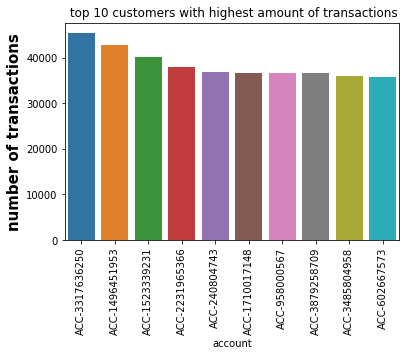

In [39]:

sns.barplot(x=df2.index, y=df2['amount'])
plt.xticks(rotation=90)
plt.ylabel('number of transactions', weight='bold', size=15)
plt.title(' top 10 customers with highest amount of transactions')

In [40]:
customers=df.groupby(['account']).agg({'customer_id':'count'})
df2=customers.sort_values(by='customer_id',ascending=False)
df4=df2.head(10)

Text(0.5, 1.0, 'customers with highest number of transactions')

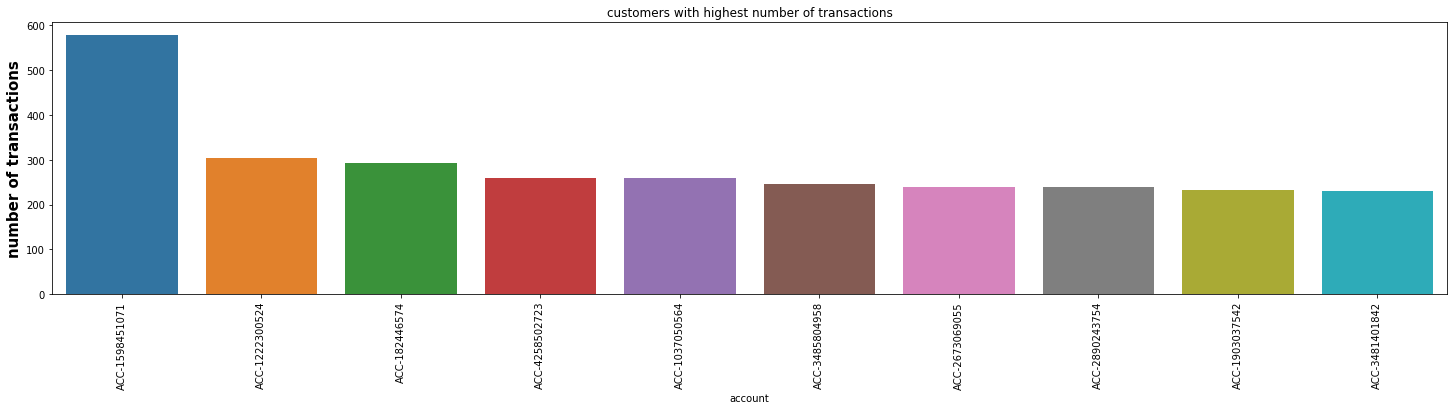

In [41]:
plt.figure(figsize=(25,5))
sns.barplot(x=df4.index, y=df4['customer_id'])
plt.xticks(rotation=90)
plt.ylabel('number of transactions', weight='bold', size=15)
plt.title('customers with highest number of transactions')

In [42]:
def age_group(age):
    if age >=18 and age<=24:
        return '18-24'
    elif age >=25 and age<=31:
        return '25-31'
    elif age >=32 and age<=38:
        return '32-38'
    elif age >=39 and age<=44:
        return '39-44'
    elif age >=45 and age<=51:
        return '45-51'
    elif age >=52 and age<=58:
        return '52-58'
    elif age >=59 and age<=64:
        return '59-64'
    elif age >=65 and age<=71:
        return '65-71'
    else:
        return '72-78'
  
    

In [43]:
df['age_group']=df.age.apply(age_group)

In [44]:
df[['age','age_group']].head()

,age,age_group
0,26,25-31
1,26,25-31
2,38,32-38
3,40,39-44
4,26,25-31


In [45]:
customers=df.groupby(['age_group']).agg({'amount':'mean'})

In [46]:
highest_spending_age_groups=customers.sort_values(by='amount',ascending=False)
df3=highest_spending_age_groups
df3

,amount
age_group,
52-58,323.414267
72-78,318.977941
45-51,248.770358
39-44,223.650512
32-38,200.315673
18-24,183.414144
65-71,183.139412
25-31,151.187948
59-64,120.311591


Text(0.5, 1.0, 'Accounts with highest average amount spent vs age group')

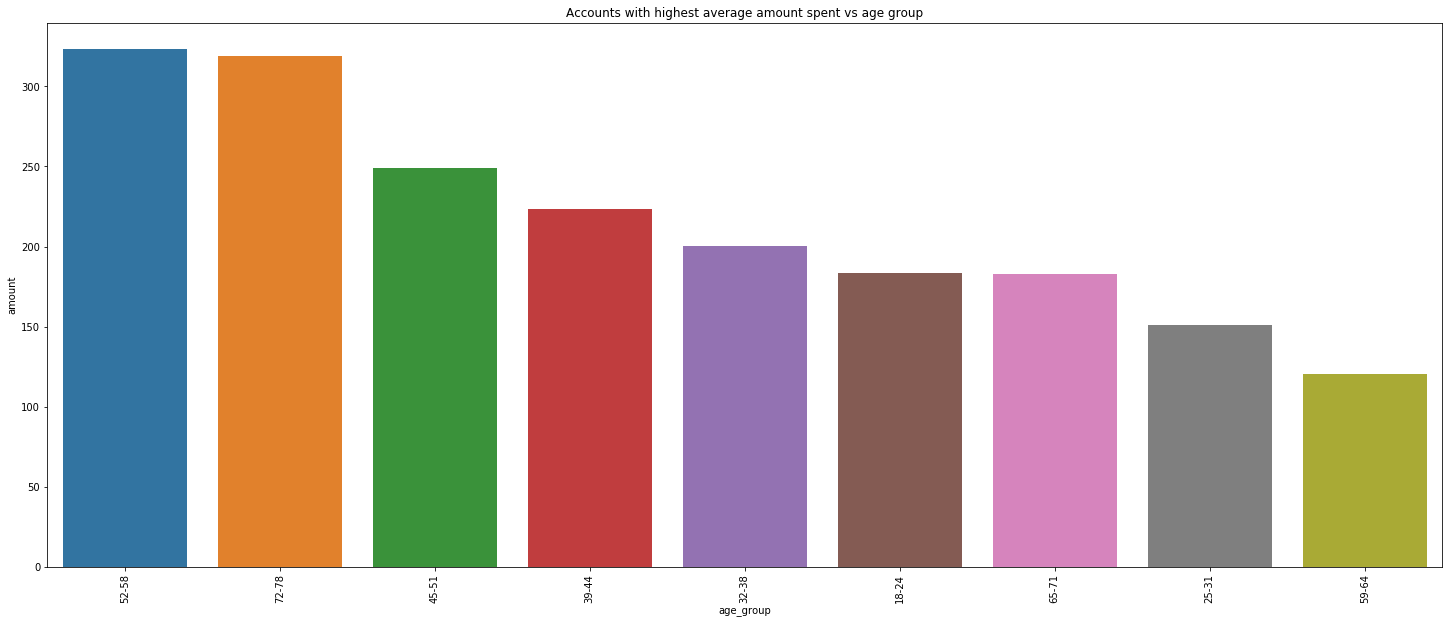

In [47]:
plt.figure(figsize=(25,10))
sns.barplot(x=df3.index, y=df3['amount'])
plt.xticks(rotation=90)
plt.title('Accounts with highest average amount spent vs age group')

In [48]:
customers=df.groupby(['age_group']).agg({'balance':'mean'})
customers

,balance
age_group,
18-24,9645.707589
25-31,7266.367805
32-38,14714.135220
39-44,29479.098662
45-51,69113.462085
52-58,6324.479667
59-64,2850.807045
65-71,6218.711471
72-78,54240.641471


In [49]:
highest_earning_age_groups=customers.sort_values(by='balance',ascending=False)
df3=highest_earning_age_groups
df3

,balance
age_group,
45-51,69113.462085
72-78,54240.641471
39-44,29479.098662
32-38,14714.135220
18-24,9645.707589
25-31,7266.367805
52-58,6324.479667
65-71,6218.711471
59-64,2850.807045


Text(0.5, 1.0, 'Account with highest average earnings vs age group')

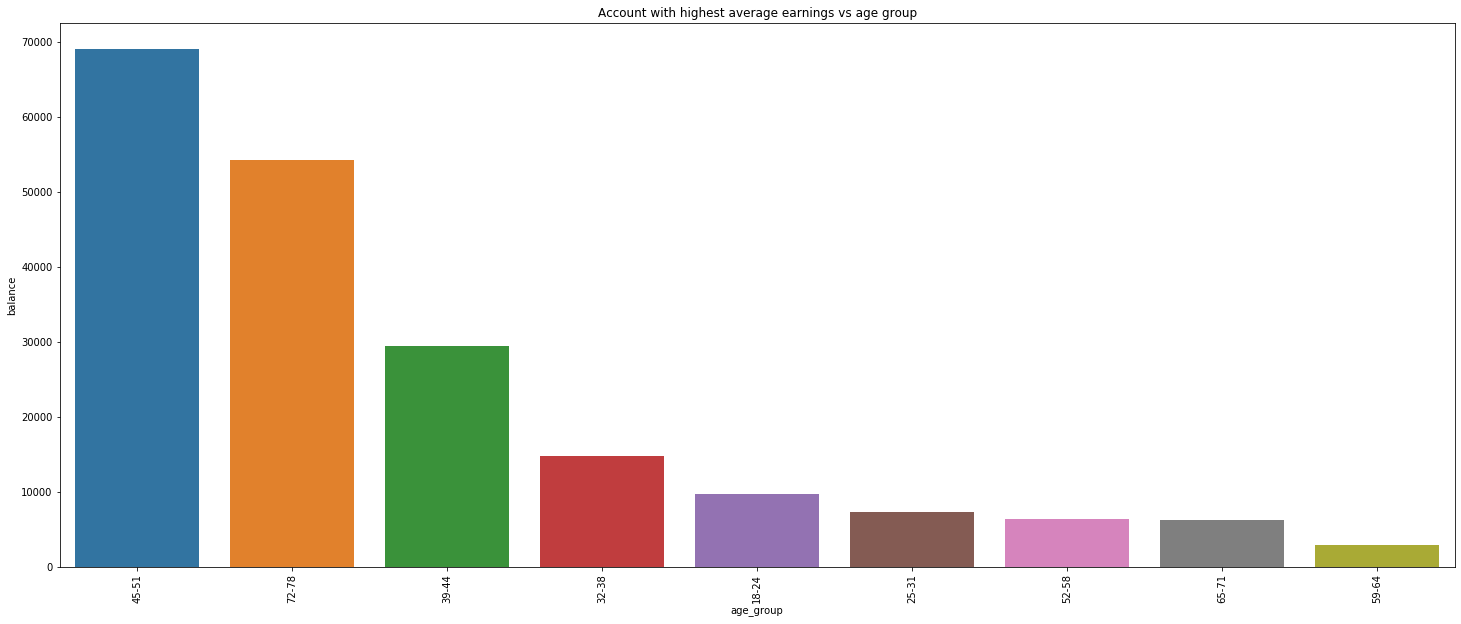

In [50]:
plt.figure(figsize=(25,10))
sns.barplot(x=df3.index, y=df3['balance'])
plt.xticks(rotation=90)
plt.title('Account with highest average earnings vs age group')

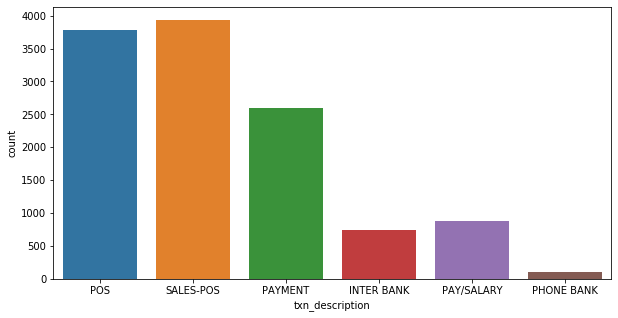

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(anz.txn_description)

In [52]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [53]:
customers=['SALES-POS','POS']
pos_salespos_transactions=df[df['txn_description'].isin(customers)]
pos_salespos_transactions.shape

(7717, 21)

In [54]:
df.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month', 'age_group'],
      dtype='object')

In [55]:
customers=pos_salespos_transactions.groupby(['age_group']).agg({'account':'count'})
df3=customers.sort_values(by='account',ascending=False)
df3

,account
age_group,
18-24,2603
25-31,2216
32-38,1446
39-44,1111
45-51,135
52-58,91
59-64,59
65-71,53
72-78,3


Text(0.5, 1.0, 'sales pos,pos transaction numbers vs age_group')

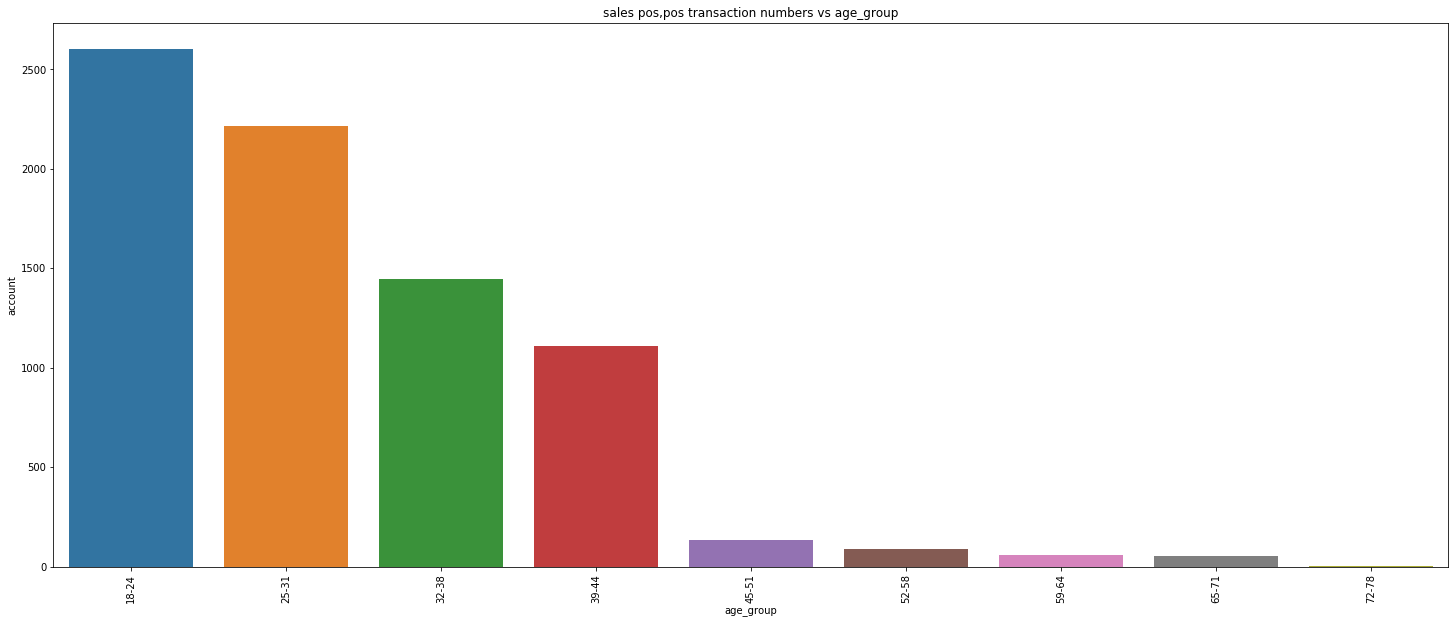

In [56]:
plt.figure(figsize=(25,10))
sns.barplot(x=df3.index, y=df3['account'])
plt.xticks(rotation=90)
plt.title('sales pos,pos transaction numbers vs age_group')

In [57]:
customers=['PAY/SALARY']
pay_salary_transactions=df[df['txn_description'].isin(customers)]
pay_salary_transactions.shape

(883, 21)

In [58]:
customers=pay_salary_transactions.groupby(['age_group']).agg({'account':'count'})
df3=customers.sort_values(by='account',ascending=False)
df3

,account
age_group,
18-24,286
25-31,182
32-38,166
39-44,158
45-51,32
52-58,20
65-71,14
59-64,13
72-78,12


Text(0.5, 1.0, ' number of pay/salary transaction vs age_group ')

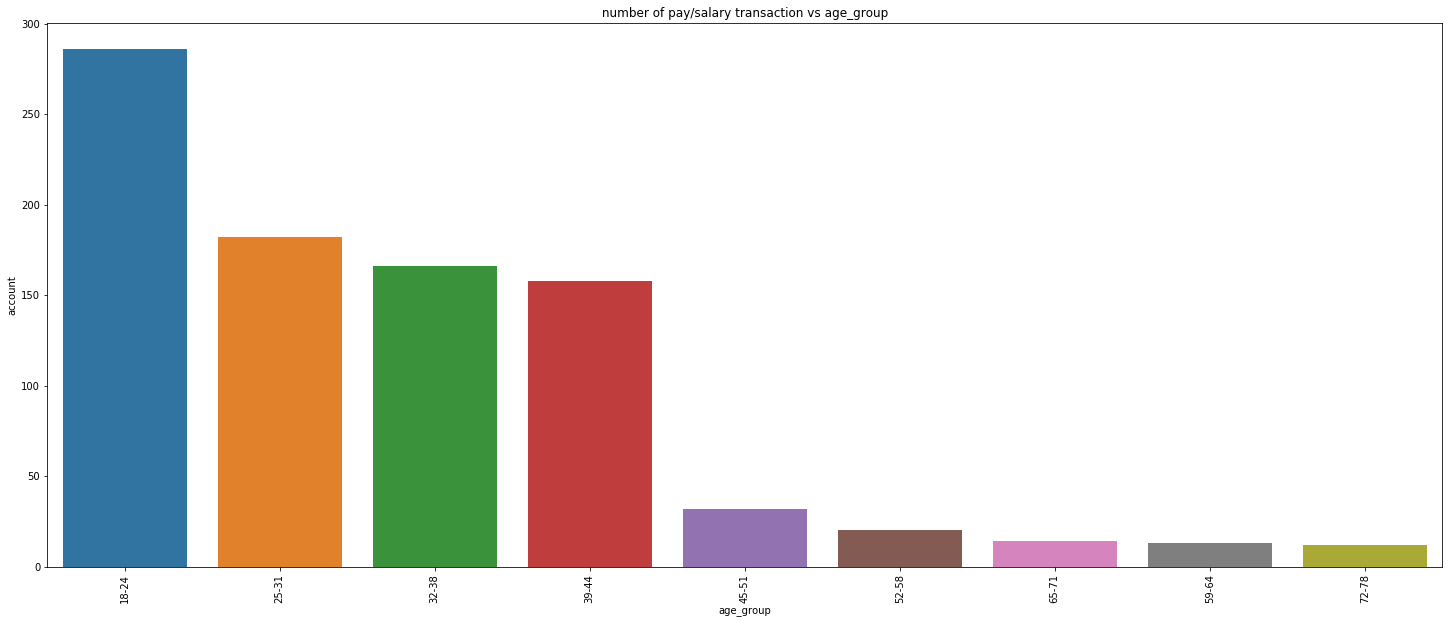

In [59]:
plt.figure(figsize=(25,10))
sns.barplot(x=df3.index, y=df3['account'])
plt.xticks(rotation=90)
plt.title(' number of pay/salary transaction vs age_group ')

Text(0.5, 1.0, 'Customers vs number of transactions')

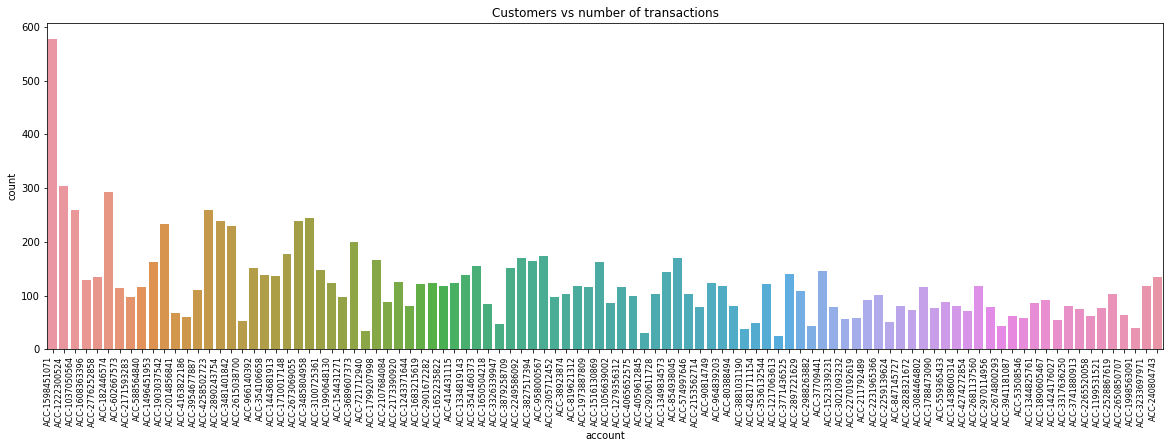

In [60]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='account',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Customers vs number of transactions")

In [61]:
df['day'] = pd.DatetimeIndex(df['date']).day

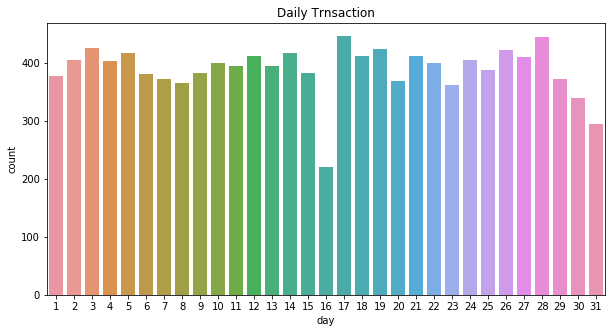

In [62]:
plt.figure(figsize=(10,5))
plt.title('Daily Trnsaction')
sns.countplot(x=df['day'],data=df)